# Практика 11

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import category_encoders as ce
from sklearn.model_selection import train_test_split

## Задание 11.2

In [20]:
rent = pd.read_csv('C:/Users/Александра/Downloads/move.csv')
rent.drop('Unnamed: 0', axis=1, inplace=True)
rent

metro  price   way  views  \
0                      Planernaia   45000  walk    513   
1                           VDNKh   50000  walk    389   
2                   Alekseevskaia   50000  walk    483   
3                        Sviblovo   38000  walk    414   
4                        Rimskaia   55999  walk    360   
...                            ...    ...   ...    ...   
1441                    Solntcevo   25000  walk    189   
1442    Ulitca Starokachalovskaia   25000  walk    173   
1443                    Zhulebino   25000  walk    102   
1444   Preobrazhenskaia ploshchad   40000  walk     60   
1445                  Rasskazovka   30000  walk   2728   

                         provider  fee_percent  storey  minutes  storeys  \
0     realtor                               50       7       10       12   
1     realtor                               50      16       10       16   
2     realtor                               50       5        3       12   
3     realtor                               50       3       15        5   
4     realtor                               99       6        7       17   
...                           ...          ...     ...      ...      ...   
1441     realtor                             0       6        5       23   
1442     realtor                             0       5        5       17   
1443     realtor                             0       5        5       12   
1444     realtor                            30       3       17        9   
1445       owner                             0      12       10       17   

      living_area  kitchen_area  total_area  
0              19             8          38  
1              18             8          41  
2              19             5          33  
3              37            37          37  
4              21            10          40  
...           ...           ...         ...  
1441           20            10          36  
1442           20            10          38  
1443           20            10          35  
1444           20             8          35  
1445           22             8          33  

[1446 rows x 12 columns]

Обработка дубликатов

In [21]:
rent.drop_duplicates(inplace=True)

In [22]:
rent['provider'] = rent['provider'].apply(lambda x: x.strip())

In [23]:
rent.reset_index(inplace=True, drop=True)

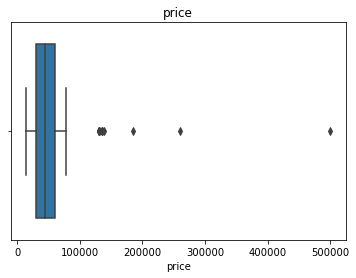

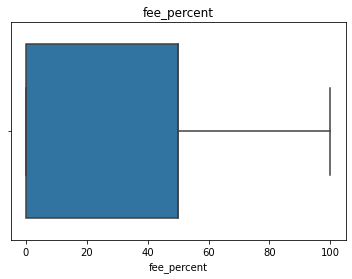

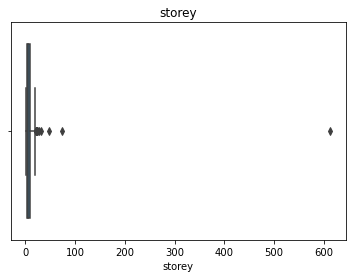

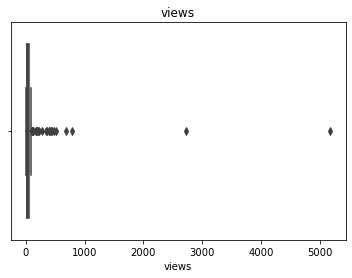

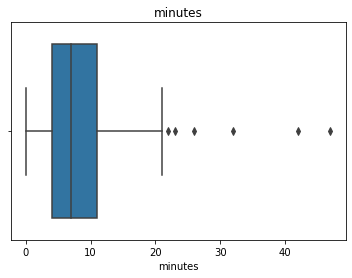

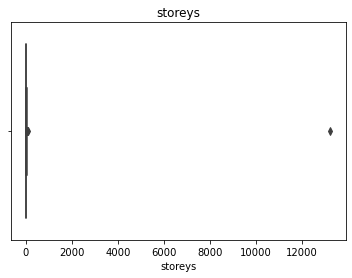

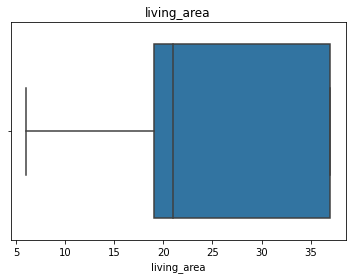

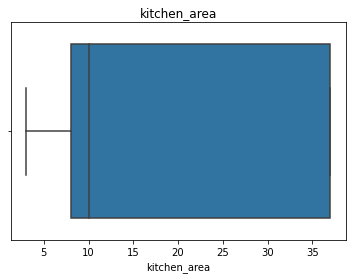

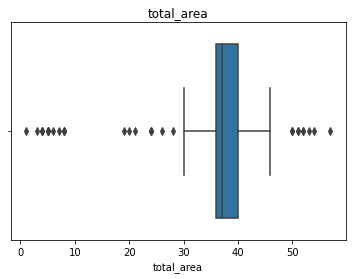

In [24]:
outliers = ['price', 'fee_percent', 'storey', 'views', 
            'minutes', 'storeys',
           'living_area', 'kitchen_area', 'total_area']


for i in outliers:
    sns.boxplot(data=rent, x=i)
    plt.title(i)
    plt.show()

In [25]:
# удаление выбросов
rent = rent[(np.abs(stats.zscore(rent[['storey', 'storeys', 'price', 'views', 'total_area']])) < 3).all(axis=1)]

rent.reset_index(inplace=True, drop=True)

In [26]:
encoder = ce.BinaryEncoder(cols=['way', 'provider'])
df = encoder.fit_transform(rent)
df

metro  price  way_0  way_1  views  provider_0  provider_1  \
0            Planernaia   45000      0      1    513           0           0   
1                 VDNKh   50000      0      1    389           0           0   
2         Alekseevskaia   50000      0      1    483           0           0   
3              Sviblovo   38000      0      1    414           0           0   
4              Rimskaia   55999      0      1    360           0           0   
..                   ...    ...    ...    ...    ...         ...         ...   
220   Buninskaia Alleia   29000      1      0     25           1           0   
221            Liublino   43000      0      1     23           0           1   
222   Botanicheskii sad   60000      0      1     21           1           0   
223              No data  30000      0      1      9           0           1   
224       Shabolovskaia   20000      0      1     74           0           0   

     provider_2  fee_percent  storey  minutes  storeys  living_area  \
0             1           50       7       10       12           19   
1             1           50      16       10       16           18   
2             1           50       5        3       12           19   
3             1           50       3       15        5           37   
4             1           99       6        7       17           21   
..          ...          ...     ...      ...      ...          ...   
220           0           50       3       18        9           37   
221           1           70       1       11        5           16   
222           0           50       5        2       26           37   
223           1            0       2        0        4           37   
224           1           50       5       10        8           20   

     kitchen_area  total_area  
0               8          38  
1               8          41  
2               5          33  
3              37          37  
4              10          40  
..            ...         ...  
220            37          37  
221             6          31  
222            37          37  
223            37          37  
224            10          40  

[225 rows x 15 columns]

In [27]:
df2 = df.drop('metro', axis=1)

RandomForestRegressor

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
y = df2['price']
df2.drop('price', axis=1, inplace=True)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=42, shuffle=False)

In [33]:
rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)

In [34]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor()

# обучение модели
xgb_r.fit(x_train, y_train)

# Прогнозирование цены на тестовой выборке
xgb_pred = xgb_r.predict(x_test)

In [15]:
from sklearn.ensemble import ExtraTreesRegressor

In [35]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=42)
etr.fit(x_train, y_train)
etr_pred = etr.predict(x_test)

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

def r2(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return round(r2, 3)
    
def mae(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    return round(mae, 3)    
    
def rmsle(y_true, y_pred):
    if any(x < 0 for x in y_pred):
        y_pred = [abs(i) for i in y_pred]
    rmsle = mean_squared_log_error(y_true, y_pred, squared=False)
    return round(rmsle, 3)

In [36]:
metrics = pd.DataFrame({'RandomForest': [r2(y_test, rfr_pred), mae(y_test, rfr_pred), rmsle(y_test, rfr_pred)],
                       'XGBoost': [r2(y_test, xgb_pred), mae(y_test, xgb_pred), rmsle(y_test, xgb_pred)],
                       'ExtraTree': [r2(y_test, etr_pred), mae(y_test, etr_pred), rmsle(y_test, etr_pred)]},
                      index=['R2', 'MAE', 'RMSLE'])
metrics

RandomForest    XGBoost  ExtraTree
R2            0.007      0.256      0.312
MAE       11316.706  10427.607   9708.030
RMSLE         0.301      0.260      0.234

Модель ExtraTree лучше по всем рассчитанным метрикам.

#### Важность признаков

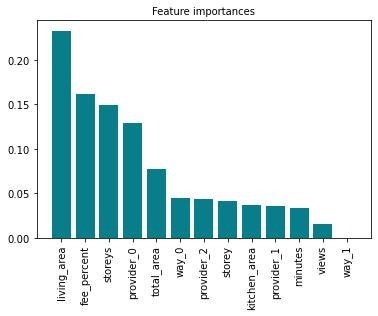

In [38]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': xgb_r.feature_importances_})

importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances', size=10)
plt.xticks(rotation='vertical')
plt.show()